# Data Analysis

## Libary importation

In [1]:
# Traitement de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("X_train_NHkHMNU.csv")
y = pd.read_csv("y_train_ZAN5mwg.csv")

# Merge both datasets
df = pd.concat([X, y], axis=1)

# Drop the second-to-last column if needed
df = df.drop(df.columns[-2], axis=1)
df = df.sort_values("DAY_ID")

## Univariate Data Analysis

The aim of this part is to study the behavior the each variable independently to better understand its distribution, features, quality...

For this analysis, we will study the french and german separatly to better understand and show the differences between the two countries. We will further show, how we are able to explain the behavior of some variables from real life conditions.

- Vérifié la qualité et le comportement de chaques variables, faire analyse pour les deux df et comparer les différences (distributions, statistiques etc) montrer les différences de comportement des variables propres à chaques pays (la colonne nucléaire_fr différentes distribution que nucléaire_de), c'est très important d'appuyer les différences de comportement et pourquoi pas justifier ça, grâce à des informations extérieures (par exemple que le prix de l'électricité français est moins volatile car repose sur le nucléaire qui est stable)


In [3]:
df

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,-0.650577,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


The dataset shows that for some days, we have the price for both France and Germany. So, for rows that have the same day `DAY_ID`, each column have the same value (except for the price : one for France and one for Germany).

If there are duplications for each day (one France, one Germany), we would not have to do two different analyses, one for each dataset as they would be the same.

Let's check that statement :

In [4]:
FR = df[df["COUNTRY"] == "FR"].sort_values("DAY_ID")
DE = df[df["COUNTRY"] == "DE"].sort_values("DAY_ID")

In [5]:
print("Number of days for French's dataset : ", len(FR))
print("Number of days for German's dataset : ", len(DE))

Number of days for French's dataset :  851
Number of days for German's dataset :  643


We can see that the french dataset is much larger than the german one. Thus it means there are singletons, and not only duplications. Thus we have to do two separate study for the french and german datasets.

### French dataset Analysis

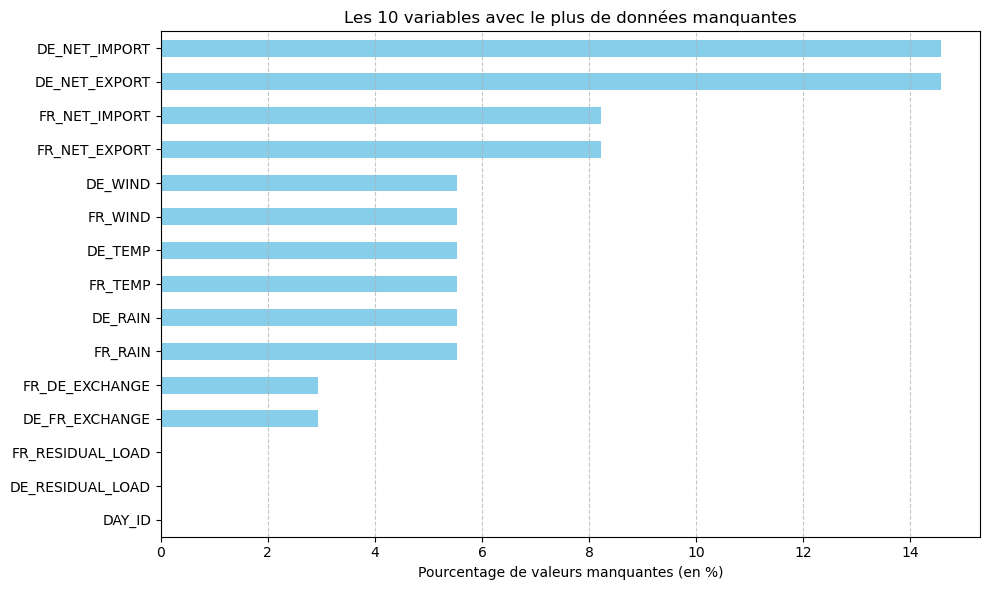

In [7]:
# percentage of missing values per column
missing_values = FR.isnull().mean() * 100

# top 10 of columns with the most missing values
top_15_colonnes = missing_values.sort_values(ascending=False).head(15)

# Horizontal barplot
plt.figure(figsize=(10, 6))
top_15_colonnes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Pourcentage de valeurs manquantes (en %)")
plt.title("Les 10 variables avec le plus de données manquantes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**

TO ADD

#### Study of the target variable `TARGET`

In [8]:
#Descriptive statistics
print("Target variable's description : \n", FR['TARGET'].describe(), "\n")

Target variable's description : 
 count    851.000000
mean       0.046026
std        1.023512
min       -6.519268
25%       -0.178023
50%       -0.003619
75%        0.174344
max        7.786578
Name: TARGET, dtype: float64 



D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


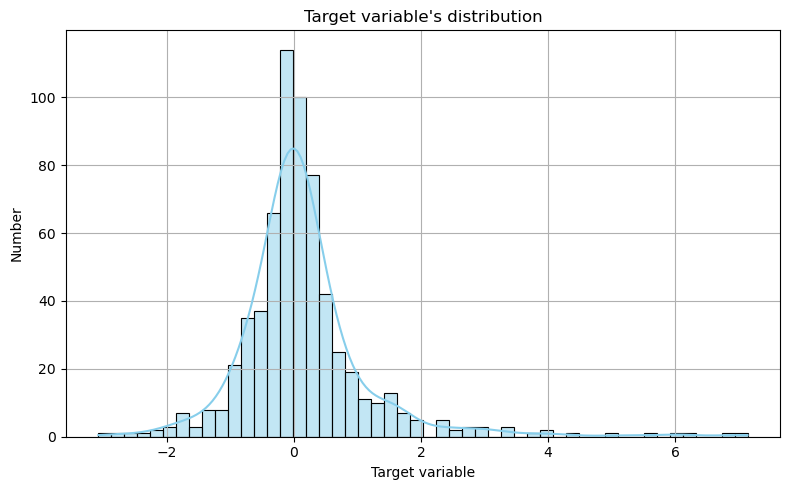

In [10]:
# Histogram distribution

plt.figure(figsize=(8, 5))
sns.histplot(DE["TARGET"], bins=50, kde=True, color="skyblue")
plt.title("Target variable's distribution")
plt.xlabel("Target variable")
plt.ylabel("Number")
plt.grid(True)
plt.tight_layout()
plt.show()